In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('jumlah_tempat_hiburan1.csv')

Text(0, 0.5, 'Tahun')

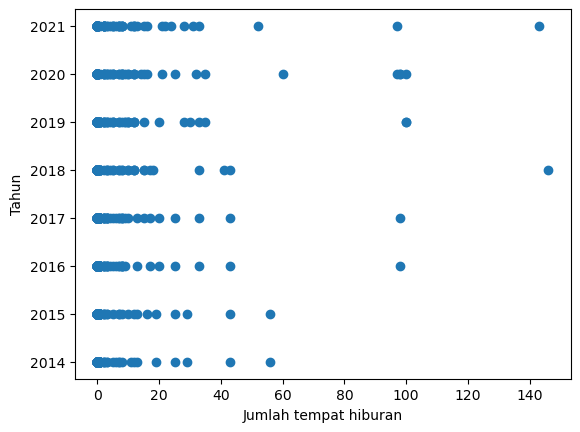

In [3]:
plt.scatter(df['jumlah_tempat_hiburan'], df['tahun'])
plt.xlabel('Jumlah tempat hiburan')
plt.ylabel('Tahun')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     1080 non-null   int64 
 1   kode_provinsi          1080 non-null   int64 
 2   kode_kabupaten_kota    1080 non-null   int64 
 3   nama_kabupaten_kota    1080 non-null   object
 4   jenis_tempat_hiburan   1080 non-null   object
 5   jumlah_tempat_hiburan  1080 non-null   int64 
 6   satuan                 1080 non-null   object
 7   tahun                  1080 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 67.6+ KB


In [10]:
x_train = df[['jumlah_tempat_hiburan','tahun']].values

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)

In [12]:
x_train

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [13]:
kmean = KMeans(n_clusters=3)
kmean

KMeans(n_clusters=3)

In [14]:
y_cluster = kmean.fit_predict(x_train)

In [15]:
y_cluster

array([0, 0, 0, ..., 2, 2, 2])

In [16]:
df['Cluster'] = y_cluster

In [17]:
df

,id,kode_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_tempat_hiburan,jumlah_tempat_hiburan,satuan,tahun,Cluster
0,1,32,3201,KABUPATEN BOGOR,NIGHT CLUB,0,UNIT,2014,0
1,2,32,3201,KABUPATEN BOGOR,PUB,0,UNIT,2014,0
2,3,32,3201,KABUPATEN BOGOR,DISKOTIK,0,UNIT,2014,0
3,4,32,3201,KABUPATEN BOGOR,KARAOKE/BAR,0,UNIT,2014,0
4,5,32,3201,KABUPATEN BOGOR,PANTI PIJAT,43,UNIT,2014,0
...,...,...,...,...,...,...,...,...,...
1075,1076,32,3279,KOTA BANJAR,NIGHT CLUB,0,UNIT,2021,2
1076,1077,32,3279,KOTA BANJAR,PUB,0,UNIT,2021,2
1077,1078,32,3279,KOTA BANJAR,DISKOTIK,0,UNIT,2021,2
1078,1079,32,3279,KOTA BANJAR,KARAOKE/BAR,0,UNIT,2021,2


In [18]:
kmean.cluster_centers_

array([[0.01500085, 0.14285714],
       [0.02240825, 0.57142857],
       [0.03579401, 0.92857143]])

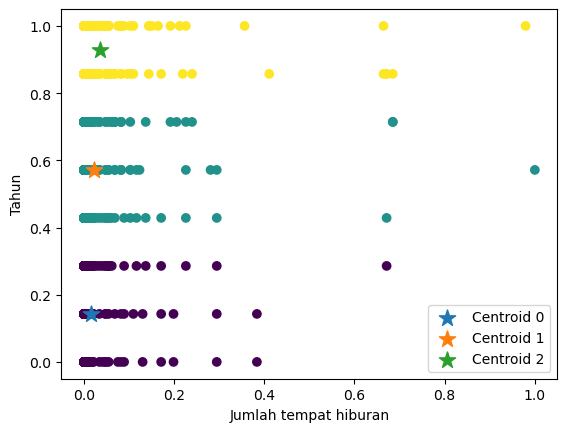

In [27]:
plt.scatter(x_train[:,0], x_train[:,1], c=kmean.labels_)
plt.scatter(kmean.cluster_centers_[0,0], kmean.cluster_centers_[0,1], cmap='rainbow', marker='*', s=150, label='Centroid 0')
plt.scatter(kmean.cluster_centers_[1,0], kmean.cluster_centers_[1,1], cmap='rainbow', marker='*', s=150, label='Centroid 1')
plt.scatter(kmean.cluster_centers_[2,0], kmean.cluster_centers_[2,1], cmap='rainbow', marker='*', s=150, label='Centroid 2')
plt.xlabel("Jumlah tempat hiburan")
plt.ylabel("Tahun")
plt.legend()

In [31]:
inertias = []
k_range = range(1,150)
for k in k_range:
    km = KMeans(n_clusters=k).fit(x_train)
    inertias.append(km.inertia_)

C:\Users\Farhan\AppData\Local\Temp\ipykernel_7744\3102192294.py:4: ConvergenceWarning: Number of distinct clusters (148) found smaller than n_clusters (149). Possibly due to duplicate points in X.
  km = KMeans(n_clusters=k).fit(x_train)


In [32]:
inertias

[123.80535237087285,
 35.58885592382468,
 20.418774649480042,
 13.527017916483159,
 8.427720660003107,
 7.050152264367094,
 5.682720601903478,
 4.319040978398354,
 2.977367246339306,
 2.3789417897504137,
 1.9937589807794907,
 1.607803020212678,
 1.294014641333206,
 1.1608963163903154,
 1.0008374435426481,
 0.9410695347482483,
 0.8377330842396786,
 0.7810962107477726,
 0.7224554581319669,
 0.6215255414891316,
 0.5573911765221503,
 0.535747753213765,
 0.47189984712218347,
 0.41698135258801333,
 0.37487411653311287,
 0.33914305810321477,
 0.28352238394111684,
 0.2767366412165395,
 0.23236974406429667,
 0.2203996252292219,
 0.19389054614057172,
 0.17461020212668393,
 0.17150680376160532,
 0.15583696973228853,
 0.134192032119819,
 0.1290115807344531,
 0.11720852108047308,
 0.10378942575339177,
 0.0976338576118835,
 0.09139502793175304,
 0.08727692810506849,
 0.08177168777328303,
 0.07444457878563099,
 0.07508034849950351,
 0.06593555644183959,
 0.06401259122448093,
 0.05981715962308241,
 0.

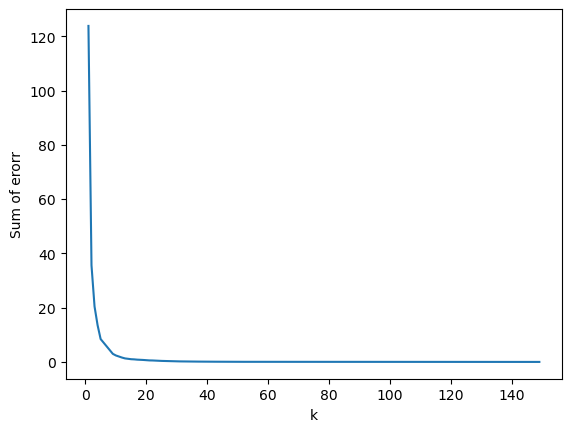

In [33]:
plt.xlabel("k")
plt.ylabel("Sum of erorr")
plt.plot(k_range,inertias)